In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
df = pd.read_excel('/content/drive/MyDrive/졸업작품2/최종_빈도+소비_분석준비_0928 (1).xlsx')
df = df.drop('Unnamed: 0', axis=1)
df
# df = df.drop('의료.1', axis=1)

,일자,C1,C2,C3,C4,C5,C6,C7,M1,M2,M3,M4,M5,M6,M7,expenditure_tour
0,20221029,8,1,0,3,0,0,0,0,0,12,0,0,0,0,47794532
1,20221030,1289,326,152,422,64,61,3,226,3,1560,295,193,7,33,37155395
2,20221031,1380,516,273,189,215,120,6,486,12,1711,294,159,27,10,29237326
3,20221101,1037,359,174,117,124,101,5,321,7,1106,241,178,55,9,29130528
4,20221102,1077,319,189,57,109,59,19,301,0,1175,197,71,82,3,30257440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20231124,8,5,4,3,0,2,1,0,0,23,0,0,0,0,37160819
366,20231126,4,6,0,0,0,2,0,0,0,6,6,0,0,0,37049141
367,20231128,13,10,1,0,2,3,3,0,0,31,1,0,0,0,29963826
368,20231129,1,0,1,0,0,0,0,0,0,2,0,0,0,0,31243906


In [ ]:
# 독립변수와 종속변수 정의
# X = df[['정부', '정치 및 사회 조직', '문화 및 언론', '의료', '교육 및 연구 기관',
#         '경제 및 민간', '국제 및 외교', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']]

X = df[['C1',	'C2',	'C3',	'C4',	'C5',	'C6',	'C7',	'M1',	'M2',	'M3',	'M4',	'M5',	'M6',	'M7']]
y = df['expenditure_tour']


# Z-점수 표준화 - 독립변수만 진행(y는 안함)
# scaler = StandardScaler()  # 변수명을 scaler로 수정
# X_standardized = scaler.fit_transform(X)
# X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# y_standardized = scaler.fit_transform(y.values.reshape(-1, 1))
# y_standardized_df = pd.DataFrame(y_standardized, columns=['관광소비'])

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ===========================XGBRegressor==========================================

In [ ]:
# 필요한 라이브러리 임포트
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# XGBRegressor 모델 정의
xgb_reg = XGBRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],         # 트리 개수
    'max_depth': [3, 5, 7],                  # 트리 깊이
    'learning_rate': [0.01, 0.1, 0.2],       # 학습률
    'subsample': [0.6, 0.8, 1.0],            # 각 트리에 사용할 데이터 비율
    'colsample_bytree': [0.6, 0.8, 1.0],     # 각 트리에서 사용할 피처 비율
    'gamma': [0, 0.1, 0.3]                   # 리프 노드 추가 분할 기준
}

# 그리드 서치 정의 (10-fold 교차 검증 사용)
grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 출력
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE from Grid Search:", np.sqrt(-grid_search.best_score_))

# 최적의 모델로 예측 수행
best_xgb_reg = grid_search.best_estimator_
y_pred_train = best_xgb_reg.predict(X_train)
y_pred_test = best_xgb_reg.predict(X_test)

# 성능 평가: MSE 및 RMSE 계산
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# 결과 출력
print("XGBRegressor RMSE - train:", rmse_train)
print("XGBRegressor RMSE - test:", rmse_test)


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best RMSE from Grid Search: 5630024.1072562365
XGBRegressor RMSE - train: 5162902.1250273
XGBRegressor RMSE - test: 6315328.843189821


In [ ]:
# 교차 검증으로 모델 성능 평가
scores = cross_val_score(best_xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
xgb_rmse_scores = np.sqrt(-scores)

# 교차 검증 점수 출력
explain_scores(xgb_rmse_scores)

RMSE 점수: [5899772.10521356 5660710.82717868 5390634.21180937 4395111.70038258
 5480035.41582164 7221834.28989742 4587512.9701778  5704568.52346596
 5441870.05320293 6029743.51198189]
평균 RMSE: 5581179.360913184
RMSE 표준 편차: 740005.6686290269


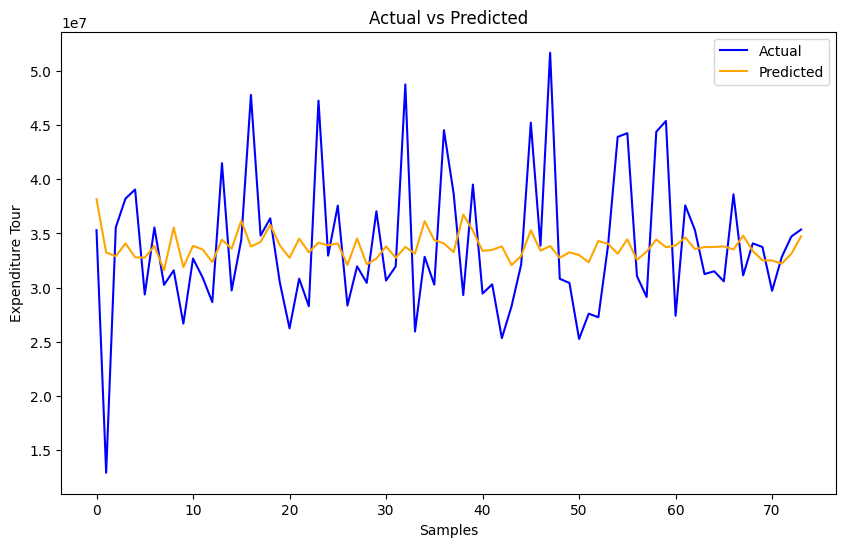

In [ ]:
import matplotlib.pyplot as plt

# 실제값과 예측값 비교 그래프
plt.figure(figsize=(10, 6))

# 실제값
plt.plot(y_test.values, label="Actual", color='blue')

# 예측값
plt.plot(y_pred_test, label="Predicted", color='orange')

plt.title("Actual vs Predicted")
plt.xlabel("Samples")
plt.ylabel("Expenditure Tour")
plt.legend()
plt.show()


In [31]:
# MAPE (Mean Absolute Percentage Error) 계산
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('The MAPE of XGBoost is:', mape, '%')




The MAPE of XGBoost is: 14.930663016494858 %


In [33]:
jjh = pd.DataFrame({'Predicted' : y_pred_test, 'Actual' : y_test})
jjh.to_excel('XGB_res.xlsx')

In [ ]:
# # 특성 중요도 계산 (기본은 'weight', 빈도를 기준으로 기여도 계산)
# importance = best_xgb_reg.feature_importances_

# # 중요도와 각 변수 이름을 함께 보기 위해 DataFrame 생성
# feature_importance_df = pd.DataFrame({
#     'Feature': X_train.columns[:X_train.shape[1]],  # 독립변수 이름
#     'Importance': importance
# })

# # 기여도가 큰 순으로 정렬
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(feature_importance_df)

# # 중요도 시각화
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance in XGBRegressor')
# plt.gca().invert_yaxis()
# plt.show()


In [ ]:
#########################끝끝!!!#####################################################